#### Phân tích thành phần chính (PCA) (Principal component analysis)

Thường rất hữu ích khi chiếu dữ liệu có chiều cao $x \in \mathbb{R}^D$ lên một không gian con chiều thấp hơn $z \in \mathbb{R}^L$ theo cách giữ nguyên các đặc trưng độc đáo của dữ liệu. Nói cách khác, mong muốn là nắm bắt được bản chất của dữ liệu trong phép chiếu chiều thấp này. Ví dụ, nếu bạn đang huấn luyện các biểu diễn từ vựng (word embeddings) trên tập dữ liệu Wikipedia và cố gắng hiểu mối quan hệ giữa các vector từ khác nhau, sẽ dễ dàng hơn nhiều khi hình dung các mối quan hệ đó trong không gian hai chiều thông qua kỹ thuật giảm chiều. Trong phần này, chúng ta sẽ xem xét kỹ thuật học máy (ML) để giảm chiều, phân tích thành phần chính (PCA).

Trong phân tích thành phần chính (PCA), chúng ta muốn chiếu vector dữ liệu $x \in \mathbb{R}^D$ lên một vector chiều thấp hơn $z \in \mathbb{R}^L$ với $L < D$ sao cho phương sai của dữ liệu được chiếu là tối đa. Tối đa hóa phương sai của dữ liệu được chiếu là nguyên tắc cốt lõi của PCA và cho phép chúng ta giữ lại các đặc điểm độc đáo của dữ liệu. Chúng ta có thể đo lường chất lượng của phép chiếu dưới dạng lỗi tái thiết:

$$
E = \frac{1}{N} \sum_{i=1}^{N} \| x_i - \hat{x}_i \|^2 = \| X - WZ \|^2_F
$$

Ở đây, $\hat{x}_i$ (cỡ $D \times 1$) là vector tái thiết được nâng lên không gian chiều cao hơn, $z_i$ (cỡ $L \times 1$) là vector thành phần chính chiều thấp, và $W$ là ma trận trực giao có cỡ $D \times L$. Nhớ lại rằng ma trận trực giao là ma trận vuông thực có chuyển vị là nghịch đảo của nó (tức là $W^T W = WW^T = I$).

Do đó, nếu phép chiếu PCA của chúng ta là $z_i = W^T x_i$, thì $\hat{x}_i = Wz_i$. Chúng ta sẽ chứng minh rằng ma trận chiếu tối ưu $W$ (ma trận tối đa hóa phương sai của dữ liệu chiếu) tương đương với ma trận gồm $L$ vector riêng tương ứng với các trị riêng lớn nhất của ma trận hiệp phương sai thực nghiệm $\hat{\Sigma} = \frac{1}{N} \sum_i x_i x_i^T$.

Chúng ta có thể viết phương sai của dữ liệu được chiếu như sau:

$$
\frac{1}{N} \sum_{i=1}^{N} z_i^2 = \frac{1}{N} \sum_{i=1}^{N} w^T x x^T w = w^T \hat{\Sigma} w
$$

Chúng ta muốn tối đa hóa đại lượng này với ràng buộc trực giao (tức là, $\| w \|^2 = 1$). Chúng ta có thể viết Lagrangian như sau:

$$
\max J(w) = w^T \hat{\Sigma} w + \lambda \left( w^T w - 1 \right)
$$

Lấy đạo hàm và đặt nó bằng 0 cho phép chúng ta thu được biểu thức sau:

$$
\frac{\partial}{\partial w} J(w) = 2\hat{\Sigma} w - 2\lambda w = 0
$$

$$
\hat{\Sigma} w = \lambda w
$$

Do đó, hướng tối đa hóa phương sai là vector riêng của ma trận hiệp phương sai. Bằng cách nhân hai vế của phương trình với $w^T$ và sử dụng ràng buộc trực giao, chúng ta có $w^T \hat{\Sigma} w = \lambda$.

Để tối đa hóa phương sai cho thành phần chính đầu tiên, chúng ta muốn chọn vector riêng tương ứng với trị riêng lớn nhất. Chúng ta có thể lặp lại quy trình trên bằng cách trừ thành phần chính đầu tiên ra khỏi $x_i$ và sẽ phát hiện ra rằng $\hat{\Sigma} w^2 = \lambda w^2$. Bằng quy nạp, chúng ta có thể chỉ ra rằng ma trận PCA $W_{D \times L}$ bao gồm các vector riêng tương ứng với $L$ trị riêng lớn nhất của ma trận hiệp phương sai thực nghiệm $\hat{\Sigma}$.

```python
class PCA:
    def transform(X, K):
        Σ = covariance_matrix(X)  # Tính ma trận hiệp phương sai thực nghiệm
        V, λ = eig(Σ)  # Phân rã trị riêng của ma trận hiệp phương sai
        idx = argsort(λ)[::-1]  # Sắp xếp trị riêng từ lớn đến nhỏ
        V_pca = V[:, idx[:K]]  # Chọn top K vector riêng tương ứng với trị riêng lớn nhất
        λ_pca = λ[idx[:K]]  # Lưu các trị riêng lớn nhất
        X_pca = X @ V_pca  # Chiếu dữ liệu lên các thành phần chính
        return X_pca

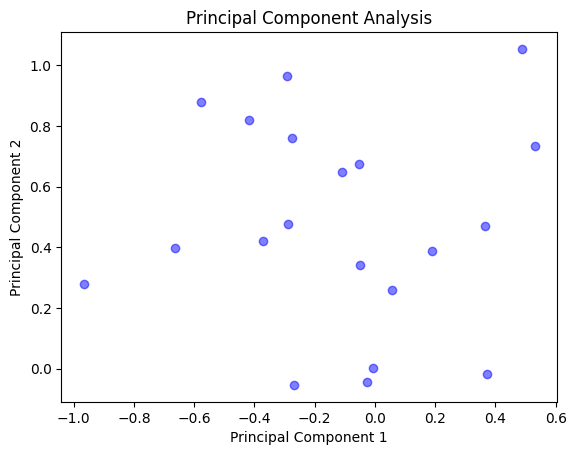

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

class PCA:
    def __init__(self, n_components=2):
        """
        Initialize PCA with the number of components.
        
        Parameters:
        - n_components: The number of principal components to retain.
        """
        self.n_components = n_components

    def covariance_matrix(self, X, Y=None):
        """
        Compute the covariance matrix of X (or between X and Y if Y is provided).
        
        Parameters:
        - X: Input data matrix of shape (n_samples, n_features).
        - Y: Optional second matrix for cross-covariance; if None, uses X.
        
        Returns:
        - Covariance matrix of shape (n_features, n_features).
        """
        if Y is None:
            Y = X
        n_samples = X.shape[0]
        # Center the data and compute the covariance matrix
        ### BEGIN SOLUTION
        X_centered = X - np.mean(X, axis=0)
        Y_centered = Y - np.mean(Y, axis=0)
        covariance_matrix = np.dot(X_centered.T, Y_centered) / (n_samples - 1)
        ### END SOLUTION
        return covariance_matrix

    def transform(self, X):
        """
        Perform PCA on the input data X, projecting it onto the top components.
        
        Parameters:
        - X: Input data matrix of shape (n_samples, n_features).
        
        Returns:
        - Transformed data matrix with reduced dimensions (n_samples, n_components).
        """
        # Compute the covariance matrix
        Sigma = self.covariance_matrix(X)
        
        # Perform eigen-decomposition
        ### BEGIN SOLUTION
        eig_vals, eig_vecs = np.linalg.eigh(Sigma)
        # Sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(eig_vals)[::-1]
        eig_vals = eig_vals[idx]
        eig_vecs = eig_vecs[:, idx]
        # Project the data onto the top eigenvectors
        X_transformed = np.dot(X, eig_vecs[:, :self.n_components])
        ### END SOLUTION
        return X_transformed

# Generate synthetic data for demonstration
n_samples = 20
n_features = 5
X = np.random.rand(n_samples, n_features)

# Create a PCA instance and perform transformation
pca = PCA(n_components=2)
X_pca = pca.transform(X)

# Plot the transformed data in the reduced space
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='b', alpha=0.5)
plt.title("Principal Component Analysis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()